In [2]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as px
import warnings

warnings.filterwarnings('ignore')

In [3]:
os.chdir('C:/Users/saksh/OneDrive/Desktop/pratice/new york AIR')

In [4]:
df = pd.read_csv("AB_NYC_2019.csv")

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


problem statement
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

unsupervised dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


observation from above data we observe that there are various out liers and null values 

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

drop columns which are not important according to observtion

In [9]:
df = df.drop(['id','host_id','name','host_name'], axis = 1)

In [10]:
df.head(1)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [11]:
df['reviews_per_month'].median()

0.72

In [12]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [13]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
df['reviews_per_month'].head()

0    0.21
1    0.38
2    0.72
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

In [15]:
df['last_review'].value_counts()

2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2012-12-25       1
2013-10-01       1
2014-05-29       1
2014-04-19       1
2018-03-29       1
Name: last_review, Length: 1764, dtype: int64

In [16]:
df['last_revies_year']=df['last_review'].str.split('-').str[0]
df['last_review_month']=df['last_review'].str.split('-').str[1]

In [17]:
df.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_revies_year,last_review_month
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05


In [18]:
df = df.drop(['last_review'],axis=1)

In [19]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
last_revies_year                  10052
last_review_month                 10052
dtype: int64

In [20]:
df['last_revies_year'].mode()

0    2019
Name: last_revies_year, dtype: object

In [21]:
df['last_revies_year'] = df['last_revies_year'].fillna(df['last_revies_year'].mode())

In [22]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
last_revies_year                  10052
last_review_month                 10052
dtype: int64

In [23]:
df['last_review_month'].mode()

0    06
Name: last_review_month, dtype: object

In [24]:
df['last_review_month'] =  df['last_review_month'].fillna(df['last_review_month'].mode())

In [25]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
last_revies_year                  10052
last_review_month                 10052
dtype: int64

some issues need to solve and creat the map using data and reference of other project

convert catogorical data into numerical form 

In [26]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [27]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [28]:
#df['neighbourhood_group'] = df['neighbourhood_group'].map({'Manhattan':1,'Brooklyn':2,'Queens':3,'Bronx':4,'Staten Island':5})

In [29]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  last_revies_year                38843 non-null  object 
 12  last_review_month               

In [31]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [32]:
#df['room_type'] = df['room_type'].map({'Private room':0.1,'Entire home/apt':0.2,'Shared room':0.3})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  last_revies_year                38843 non-null  object 
 12  last_review_month               

 data visualization

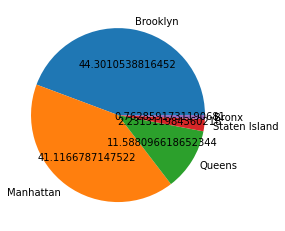

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [34]:
values = df['neighbourhood_group'].value_counts()
labels = df['neighbourhood_group'].unique().tolist()
plt.pie(values , labels=labels,autopct = str)
plt.show()
print(values)


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

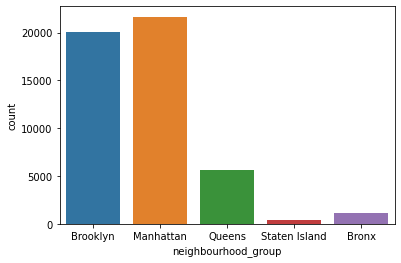

In [35]:
sns.countplot(df['neighbourhood_group'],data = df)

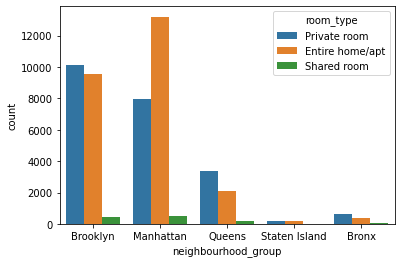

In [36]:
sns.countplot(x='neighbourhood_group',data = df,hue ='room_type');

obervation there are 51% of Entire room and 45% of the private room the number of shared room are few they are 2%
the number entier home is more in manhattan as compare to other places in other places private rooms are more

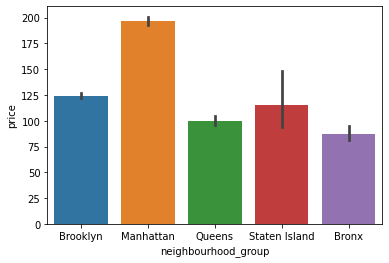

In [37]:
sns.barplot(x='neighbourhood_group',y = 'price',data = df);

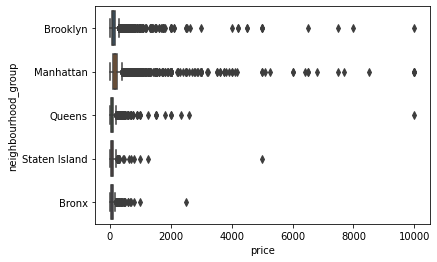

In [38]:
sns.boxplot(x='price',y='neighbourhood_group',data = df);

In [39]:
df.groupby(['neighbourhood_group','price']).mean().mean(1)

neighbourhood_group  price
Bronx                0        22.500897
                     10       21.375290
                     20        6.659285
                     21       -2.903494
                     22        0.649234
                                ...    
Staten Island        700      -3.562774
                     800      48.893506
                     1000     47.612480
                     1250      0.721116
                     5000     44.751746
Length: 1542, dtype: float64

In [40]:

def average_of_cols_across(df,across):
    data = df.groupby(by=across,as_index=False).mean()
    columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']

    fig,ax = plt.subplots(2,3,figsize=(15,10))
    row=0
    col=0
    for column in columns:
        ax[row,col].set_title( "Average {column.capitalize()} across {across.capitalize()}")
        sns.barplot(data[across],data[column],ax=ax[row,col])
        
        for p in ax[row,col].patches:
            ax[row,col].annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))

        if col==2:
            col=0
            row+=1
        else:
            col+=1

    plt.tight_layout(pad=3)
    return fig

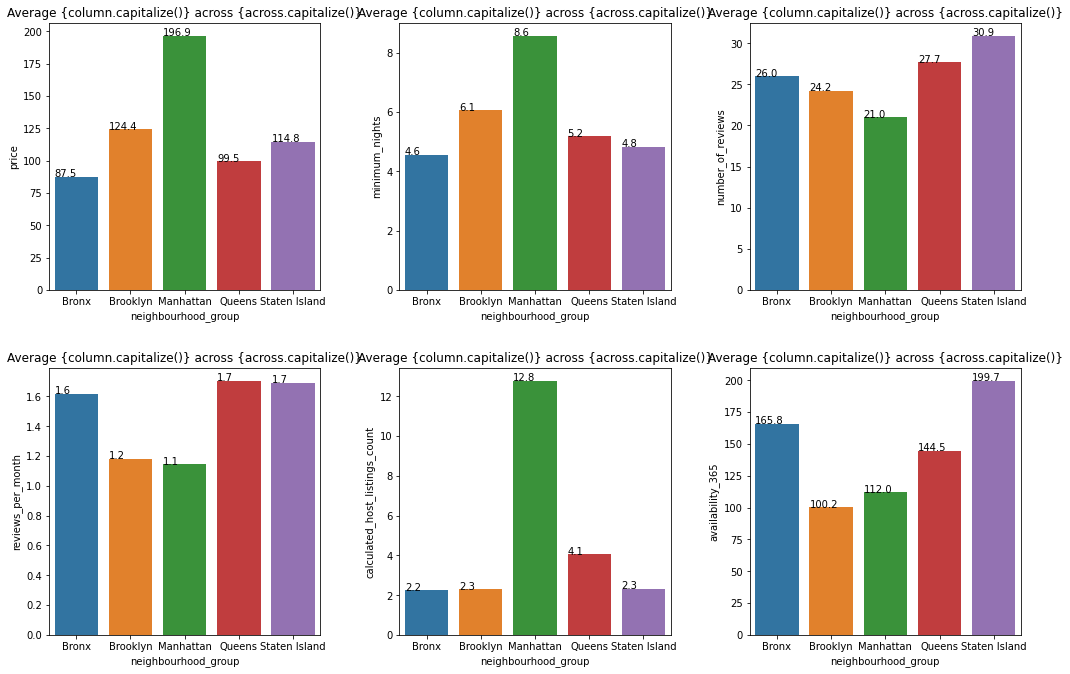

In [41]:


fig = average_of_cols_across(df,'neighbourhood_group')
fig.show()

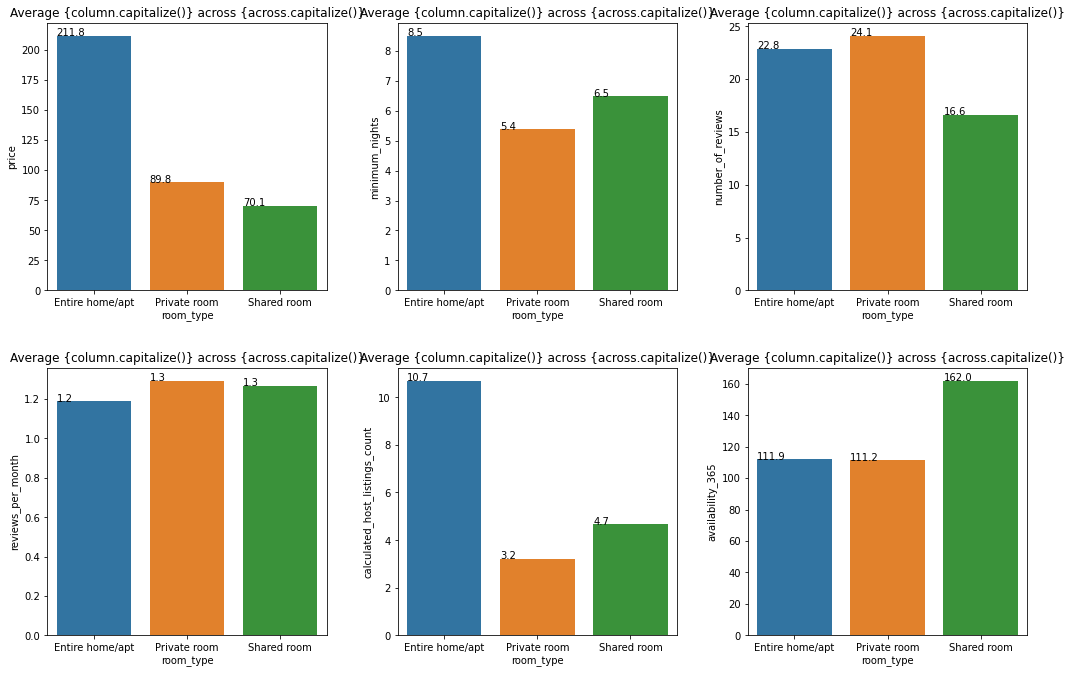

In [42]:
fig = average_of_cols_across(df,'room_type')
fig.show()

so we can say that entire home is expensive as compare to the private room and shared room and shared room the mostly cost less than entire room 
And the price in bronx is less as compare to other placess 
in bronx you can get entier home at low cost compare to otheres 
shared room price are mostly same it evey places 
manhatan is much expensive overall as compare to other places

find realtion with target varaiable

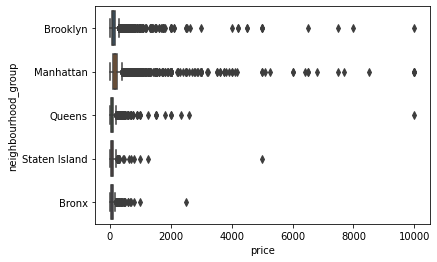

In [43]:
sns.boxplot(x='price',y='neighbourhood_group',data = df);

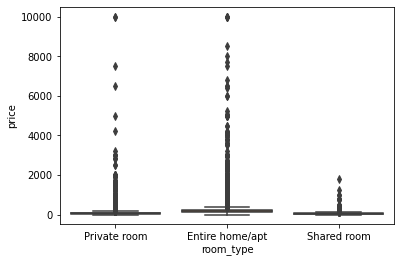

In [44]:
sns.boxplot(x='room_type',y='price',data = df);

In [45]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_revies_year,last_review_month
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,NaN,NaN
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [46]:
df = df.drop(['last_revies_year'	,'last_review_month'],axis = 1)

In [47]:
df.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


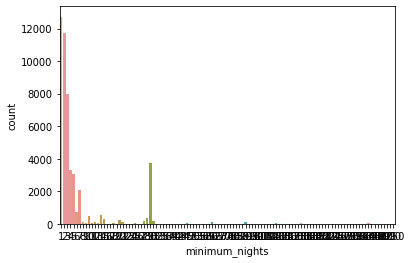

In [48]:
sns.countplot(x='minimum_nights',data = df);

<AxesSubplot:xlabel='minimum_nights'>

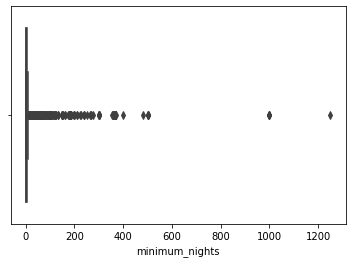

In [49]:
sns.boxplot(x='minimum_nights',data = df)

<AxesSubplot:xlabel='availability_365'>

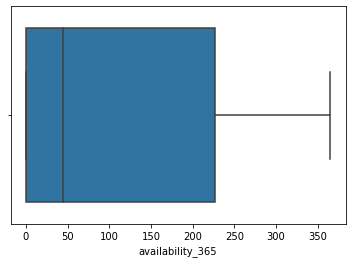

In [50]:
sns.boxplot(x='availability_365',data = df)

<AxesSubplot:xlabel='number_of_reviews'>

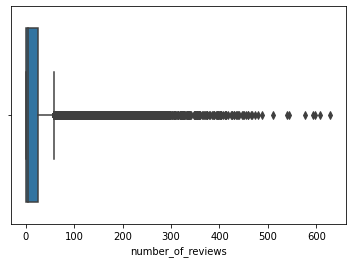

In [51]:
sns.boxplot(x= 'number_of_reviews',data =df)

<AxesSubplot:xlabel='calculated_host_listings_count'>

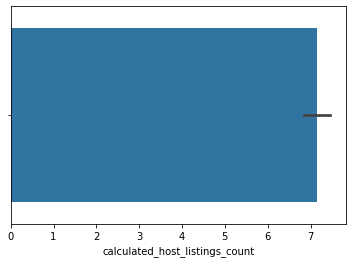

In [52]:
sns.barplot(x='calculated_host_listings_count',data = df)

so we get that there are many outlier in your data 
and data is highly skewned

In [53]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [54]:
df['neighbourhood_group']= df['neighbourhood_group'].map({'Brooklyn':1,'Manhattan':2,'Queens':3,'Staten Island':4,'Bronx':5})

In [55]:
df.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [56]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [57]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['room_type'] = label_encoder.fit_transform(df['room_type'])
df['room_type'].unique
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Kensington,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,Midtown,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,Harlem,40.80902,-73.94190,1,150,3,0,0.72,1,365
3,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,East Harlem,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])
df['neighbourhood'].unique
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,0.72,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [59]:
sort_data = np.sort(df['price'])

In [60]:
Q1 = np.percentile(df['price'],25)
Q3 = np.percentile(df['price'],75)
Q2 = np.percentile(df['price'],50)
IQR = Q3 - Q1
 

In [61]:
low_limit = Q1-1.5*IQR
upper_limit = Q2+1.5*IQR

In [62]:
Q1

69.0

In [63]:
print(low_limit)
print(upper_limit)

-90.0
265.0


In [64]:
df['price'][(df['price']>upper_limit)|(df['price']<low_limit)]

20       299
61       375
68       275
82       285
85       800
        ... 
48758    350
48833    475
48839    800
48842    350
48856    345
Name: price, Length: 4927, dtype: int64

TO remove outlier

there is some error so after this step we will get the output in outlier variable and after that we will delet the outlier 

In [65]:
df['price']=df['price'][(df['price']<upper_limit)&(df['price']>low_limit)]

In [66]:
Q1 = np.percentile(df['minimum_nights'],25)
Q3 = np.percentile(df['minimum_nights'],75)
Q2 = np.percentile(df['minimum_nights'],50)
IQR = Q3 - Q1

In [67]:
low_limit = Q1-1.5*IQR
upper_limit = Q2+1.5*IQR

In [68]:
df['minimum_nights'][(df['minimum_nights']>upper_limit)|(df['minimum_nights']<low_limit)]

4        10
6        45
14       90
27       10
29       14
         ..
48843    29
48871    29
48879    20
48882    20
48892    10
Name: minimum_nights, Length: 7123, dtype: int64

In [69]:
df['minimum_nights']=df['minimum_nights'][(df['minimum_nights']<upper_limit)&(df['minimum_nights']>low_limit)]

In [70]:
Q1 = np.percentile(df['number_of_reviews'],25)
Q3 = np.percentile(df['number_of_reviews'],75)
Q2 = np.percentile(df['number_of_reviews'],50)
IQR = Q3 - Q1

In [71]:
low_limit = Q1-1.5*IQR
upper_limit = Q2+1.5*IQR

In [72]:
df['number_of_reviews'][(df['number_of_reviews']>upper_limit)|(df['number_of_reviews']<low_limit)]

1         45
3        270
5         74
6         49
7        430
        ... 
41524     51
41954     42
42075    156
42076     82
43001     42
Name: number_of_reviews, Length: 8520, dtype: int64

In [73]:
 #df['number_of_reviews']=df['number_of_reviews'][(df['number_of_reviews']<upper_limit)&(df['number_of_reviews']>low_limit)]

In [74]:
Q1 = np.percentile(df['reviews_per_month'],25)
Q3 = np.percentile(df['reviews_per_month'],75)
Q2 = np.percentile(df['reviews_per_month'],50)
IQR = Q3 - Q1

In [75]:
low_limit = Q1-1.5*IQR
upper_limit = Q2+1.5*IQR

In [76]:
df['reviews_per_month'][(df['reviews_per_month']>upper_limit)|(df['reviews_per_month']<low_limit)]

3        4.64
7        3.47
18       4.44
53       2.82
67       4.72
         ... 
48118    3.00
48127    3.00
48228    5.00
48252    4.00
48268    3.00
Name: reviews_per_month, Length: 6958, dtype: float64

In [77]:
#df['reviews_per_month']=df['reviews_per_month'][(df['reviews_per_month']<upper_limit)&(df['reviews_per_month']>low_limit)]

In [78]:
Q1 = np.percentile(df['calculated_host_listings_count'],25)
Q3 = np.percentile(df['calculated_host_listings_count'],75)
Q2 = np.percentile(df['calculated_host_listings_count'],50)
IQR = Q3 - Q1

In [79]:
low_limit = Q1-1.5*IQR
upper_limit = Q2+1.5*IQR

In [80]:
df['calculated_host_listings_count'][(df['calculated_host_listings_count']>upper_limit)|(df['calculated_host_listings_count']<low_limit)]

0        6
9        4
12       3
21       6
22       6
        ..
48868    6
48878    5
48880    3
48887    3
48893    6
Name: calculated_host_listings_count, Length: 9934, dtype: int64

In [81]:
#df['calculated_host_listings_count']=df['calculated_host_listings_count'][(df['calculated_host_listings_count']<upper_limit)&(df['calculated_host_listings_count']>low_limit)]


In [82]:
df.head(1)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149.0,1.0,9,0.21,6,365


In [83]:
Q1 = np.percentile(df['availability_365'],25)
Q3 = np.percentile(df['availability_365'],75)
Q2 = np.percentile(df['availability_365'],50)
IQR = Q3 - Q1

In [84]:
low_limit = Q1-1.5*IQR
upper_limit = Q2+1.5*IQR

In [85]:
df['availability_365'][(df['availability_365']>upper_limit)|(df['availability_365']<low_limit)]

Series([], Name: availability_365, dtype: int64)

In [86]:
#df['availability_365']=df['availability_365'][(df['availability_365']<upper_limit)&(df['availability_365']>low_limit)]


In [87]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149.0,1.0,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,225.0,1.0,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,150.0,3.0,0,0.72,1,365
3,1,41,40.68514,-73.95976,0,89.0,1.0,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,80.0,NaN,9,0.10,1,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int64  
 1   neighbourhood                   48895 non-null  int32  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int32  
 5   price                           43910 non-null  float64
 6   minimum_nights                  41692 non-null  float64
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 3.7 MB


In [89]:
df.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             4985
minimum_nights                    7203
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [90]:
df.describe()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,43910.000000,41692.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.786911,107.122732,40.728949,-73.952170,0.504060,111.956092,2.601194,23.274466,1.238930,7.143982,112.781327
std,0.844386,68.743096,0.054530,0.046157,0.545379,58.134629,1.655995,44.550582,1.520861,32.952519,131.622289
min,1.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.000000,51.000000,40.690100,-73.983070,0.000000,65.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,2.000000,94.000000,40.723070,-73.955680,0.000000,100.000000,2.000000,5.000000,0.720000,1.000000,45.000000
75%,2.000000,178.000000,40.763115,-73.936275,1.000000,150.000000,3.000000,24.000000,1.580000,2.000000,227.000000
max,5.000000,220.000000,40.913060,-73.712990,2.000000,264.000000,8.000000,629.000000,58.500000,327.000000,365.000000


In [91]:
df['price'].mean()

111.95609200637668

In [92]:
df['price']=df['price'].fillna(df['price'].mean())

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int64  
 1   neighbourhood                   48895 non-null  int32  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int32  
 5   price                           48895 non-null  float64
 6   minimum_nights                  41692 non-null  float64
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 3.7 MB


In [94]:
df['room_type'].unique()

array([1, 0, 2])

In [95]:
df['minimum_nights'].mean()

2.601194473759954

In [96]:
df['minimum_nights'] = df['minimum_nights'].fillna(df['minimum_nights'].mean())

In [97]:
df['minimum_nights'].describe()

count    48895.000000
mean         2.601194
std          1.529158
min          1.000000
25%          1.000000
50%          2.601194
75%          3.000000
max          8.000000
Name: minimum_nights, dtype: float64

In [98]:
y = df['price']


In [99]:
x = df.iloc[:,:11]

In [100]:
x=x.drop('price',axis=1)

In [101]:
x

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,1.000000,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,1.000000,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,3.000000,0,0.72,1,365
3,1,41,40.68514,-73.95976,0,1.000000,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,2.601194,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2.000000,0,0.72,2,9
48891,1,28,40.70184,-73.93317,1,4.000000,0,0.72,2,36
48892,2,94,40.81475,-73.94867,0,2.601194,0,0.72,1,27
48893,2,95,40.75751,-73.99112,2,1.000000,0,0.72,6,2


In [102]:
y

0        149.0
1        225.0
2        150.0
3         89.0
4         80.0
         ...  
48890     70.0
48891     40.0
48892    115.0
48893     55.0
48894     90.0
Name: price, Length: 48895, dtype: float64

checking row the that should be consider 

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

ValueError: Input X must be non-negative.

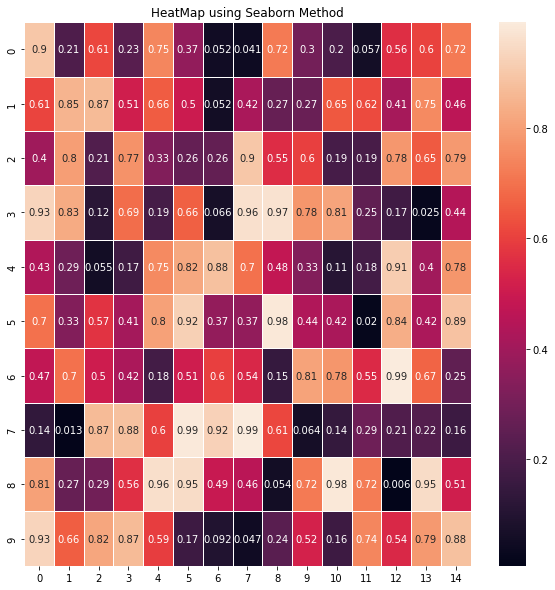

In [ ]:


 
df = np.random.rand(10,15)
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( df, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

In [ ]:
x = x.drop('neighbourhood',axis=1)

In [ ]:
x.head(1)

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,40.64749,-73.97237,1,1.0,9,0.21,6,365


In [127]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()

etr.fit(x,y)

fi_df = pd.DataFrame({"feature":x.columns,"importances":etr.feature_importances_}).sort_values(by='importances',ascending=False)

In [128]:
fi_df = pd.DataFrame({"feature":x.columns,"importances":etr.feature_importances_}).sort_values(by='importances',ascending=False)

In [129]:
fi_df

,feature,importances
4,room_type,0.357357
3,longitude,0.130320
2,latitude,0.120764
9,availability_365,0.074782
7,reviews_per_month,0.070300
6,number_of_reviews,0.065914
5,minimum_nights,0.057605
8,calculated_host_listings_count,0.047249
1,neighbourhood,0.037868
0,neighbourhood_group,0.037842


In [131]:
fig = sns.barplot(fi_df,x='feature',y='importances')
fig.show()

ValueError: Could not interpret input 'importances'

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=42)

ML model selection and implemantation

In [107]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)


RandomForestRegressor()

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [121]:

 y_pred = rfr.predict(X_test)



In [123]:
 accuracy = rfr.score(X_test,y_test)

In [124]:
accuracy

0.4923093223407482

In [132]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test,y_pred)
score_2 = mean_absolute_error(y_test,y_pred)
score_3 = r2_score(y_test,y_pred)

In [133]:
print(score)
print(score_2)
print(score_3)


1534.4191630250054
29.489769485294488
0.4923093223407482


In [113]:
df.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149.0,1.0,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,225.0,1.0,45,0.38,2,355


use to predict the value

In [115]:
rfr.predict(np.array([[2,3,42.6787,2,4,20,5,0.25,5,365]]))

array([76.66736552])

In [135]:
import xgboost as xgb


In [144]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [145]:
 y_pred2 = xgbr.predict(X_test)

In [138]:
 accuracy2 = rfr.score(X_test,y_test)

In [139]:
accuracy2

0.4923093223407482

In [147]:
from sklearn.metrics import mean_squared_error
score_4 = mean_squared_error(y_test,y_pred2)
score_5 = mean_absolute_error(y_test,y_pred2)
score_6 = r2_score(y_test,y_pred2)

In [143]:
print(score_4)
print(score_5)
print(score_6)

1514.7878817887372
29.454697519404387
0.49880469121668947


In [148]:
from sklearn.linear_model import LinearRegression

In [150]:
reg = LinearRegression()


In [157]:
reg.fit(X_train,y_train)

LinearRegression()

In [158]:
y_pred3 = reg.predict(X_test)

In [160]:
accuracy3 = reg.score(X_test,y_test)

In [161]:
accuracy3

0.4022217395948494

In [ ]:
#arr = np.array([x])
#inputArray_ = np.reshape(arr, (len(arr)/2,2))
#inputArray_ = arr.reshape(-1,40, 40, 10)